In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from ucimlrepo import fetch_ucirepo,list_available_datasets

# List of Available UCI repositories

list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [4]:
# Fetching the required dataset from list of UCI repo

adultdataset = fetch_ucirepo(id=2)

In [5]:
# Creating dataframe with feature columns and target columns

x=pd.DataFrame(adultdataset.data.features)

y=pd.DataFrame(adultdataset.data.targets,columns=['income'])

df=pd.concat([x,y],axis=1)   # To merge this 2 datasets

df.to_excel("adultdata.xlsx",index=False)   # To save this dataframe to excel into local machine

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.shape

(48842, 15)

In [10]:
df.describe

<bound method NDFrame.describe of        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Problem Statements

In [9]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [15]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [16]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

# Transformation specifications
## Quality  - Data cleaning
1. workclass column has non-workclass value which is '?'
2. occupations column has non-occupation value
3. native-country column needs data cleaning and has '?' 
## Feature Engg:
1. grouping the entities., in the column like., school - 1st-12th grade etc
2. grouping in marital status column, relationship, occupation
## Encoding categorical to numerical 

In [17]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [10]:
# Backup 

backup = df.copy()

In [11]:
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [20]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [12]:
# Filling the values with Mode value which is Private( highest) for workclass

# stripping 

#adult['workclass'] = adult['workclass'].str.strip()

# Replace 

df['workclass'] = df['workclass'].replace('?','Private')



In [22]:
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [13]:
#adult['occupation'] = adult['occupation'].str.strip()

df['occupation'] = df['occupation'].replace('?','Prof-specialty')   # Most highest value replaced with '?'

In [14]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [15]:
#adult['native-country'] = adult['native-country'].str.strip()

df['native-country'] = df['native-country'].replace('?','United-States')

In [46]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,School,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Feature engineering - data cleaning

In [37]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [38]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [16]:
df['education'] = df['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad'],'School')

df['education'] = df['education'].replace(['Assoc-acdm','Assoc-voc','Some-college','Prof-school'],'Associate degree')

df['education'] = df['education'].replace('Prof-school','Masters')

df['education'].unique()

array(['Bachelors', 'School', 'Masters', 'Associate degree', 'Doctorate'],
      dtype=object)

In [17]:
df['education'].value_counts()

education
School              22192
Associate degree    15374
Bachelors            8025
Masters              2657
Doctorate             594
Name: count, dtype: int64

In [18]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [19]:
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')

df['marital-status'] = df['marital-status'].replace(['Divorced','Separated','Widowed'],'Other')

df['marital-status'].unique()

array(['Never-married', 'Married', 'Other'], dtype=object)

In [45]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,School,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [20]:
df['occupation'] = df['occupation'].replace(['Handlers-cleaners','Other-service','Craft-repair','Transport-moving','Farming-fishing','Machine-op-inspct','Priv-house-serv','Tech-support'],'Manual/Technician Job')  

df['occupation'] = df['occupation'].replace(['Adm-clerical','Exec-managerial'],'Administrative/manager Job')

df['occupation'] = df['occupation'].replace(['Protective-serv','Armed-Forces'],'Security & Defence Services')
df['occupation'].unique()

array(['Administrative/manager Job', 'Manual/Technician Job',
       'Prof-specialty', 'Sales', 'Security & Defence Services', nan],
      dtype=object)

In [58]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Administrative/manager Job,Non-family member,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Administrative/manager Job,Spouse,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,School,9,Other,Manual/Technician Job,Non-family member,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,School,7,Married,Manual/Technician Job,Spouse,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Spouse,Black,Female,0,0,40,Cuba,<=50K


In [21]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [22]:
df['relationship'] = df['relationship'].replace(['Wife','Husband'],'Spouse')

df['relationship'] = df['relationship'].replace('Own-child','Child')

df['relationship'] = df['relationship'].replace('Not-in-family','Non-family member')
    
df['relationship'].unique()

array(['Non-family member', 'Spouse', 'Child', 'Unmarried',
       'Other-relative'], dtype=object)

In [60]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [23]:
df['income'] = df['income'].replace(['<=50K','<=50K.'],0)

df['income'] = df['income'].replace(['>50K','>50K.'],1)

df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4692,55,Self-emp-not-inc,168625,Associate degree,10,Other,Manual/Technician Job,Non-family member,White,Female,0,0,12,United-States,1
14947,21,Private,277408,Associate degree,10,Never-married,Manual/Technician Job,Unmarried,White,Female,0,0,35,United-States,0
41586,38,Private,206951,Associate degree,10,Never-married,Manual/Technician Job,Child,White,Male,0,0,40,United-States,0
24579,35,Private,226379,School,9,Married,Prof-specialty,Other-relative,White,Female,0,0,25,United-States,0
30672,44,Local-gov,177937,Doctorate,16,Married,Prof-specialty,Spouse,White,Male,0,0,36,United-States,1


# Univariate encoding 

### In case of numeric varibles:
##### * Mean, Median and mode (for central tendency)
##### * Standard deviation and variance (for spread)
##### * Histogram, box plots and density plots (for visalization of distribution")

### In case of categorical variables:
##### * Frequency tables 
##### * Bar plots or pie charts (for visualization of category distribution)

In [24]:
df['education'].unique()

array(['Bachelors', 'School', 'Masters', 'Associate degree', 'Doctorate'],
      dtype=object)

In [25]:
df_bachelors = df.loc[df['education']=='Bachelors']

df_school = df.loc[df['education']=='School']

df_masters = df.loc[df['education']=='Masters']

df_associate_degree = df.loc[df['education']=='Associate degree']

df_doctorate = df.loc[df['education']=='Doctorate']

In [32]:
df['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060,  1264,  7262,  1731,  6612], dtype=int64)

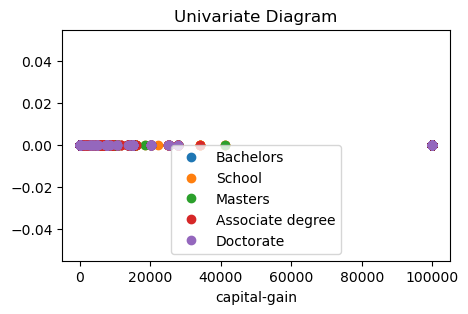

In [34]:
# Univariate diagram 

plt.figure(figsize=(5,3))

# plotting one variable at a time : where x = Capital-gain, y = Capital-gain
# Income had just 2data point the line is not perfect for univariate. 
plt.plot(df_bachelors['capital-gain'], np.zeros_like(df_bachelors['capital-gain']), 'o', label="Bachelors")

plt.plot(df_school['capital-gain'], np.zeros_like(df_school['capital-gain']), 'o', label ="School")

plt.plot(df_masters['capital-gain'], np.zeros_like(df_masters['capital-gain']), 'o', label="Masters")

plt.plot(df_associate_degree['capital-gain'], np.zeros_like(df_associate_degree['capital-gain']), 'o', label ="Associate degree")

plt.plot(df_doctorate['capital-gain'], np.zeros_like(df_doctorate['capital-gain']), 'o', label="Doctorate")

plt.xlabel('capital-gain')
plt.title('Univariate Diagram')
plt.legend()
plt.show()